## **Testing LightNet using Coffee roasting dataset**

#### We'll be testing LightNet using the coffee roasting example.

#### "The results show that **LightNet** is able to reproduce results expected of a neural network quite well with a score of .965 on the testing set."

In [1]:
import sys
sys.path.append("D:\Development\Machine_Learning\ML_Algorithms\coursera-2\Week-2\Computational_graphs")

In [2]:
import LightNet as ln
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization
import lab_coffee_utils as lcu

#### Loading the coffee roating dataset and visualising it

In [3]:
X,Y=lcu.load_coffee_data()
print(X.shape, Y.shape)

# X is the input array, while Y is the output array 
# X[0] is the temprature, X[1] is the duration

(200, 2) (200, 1)


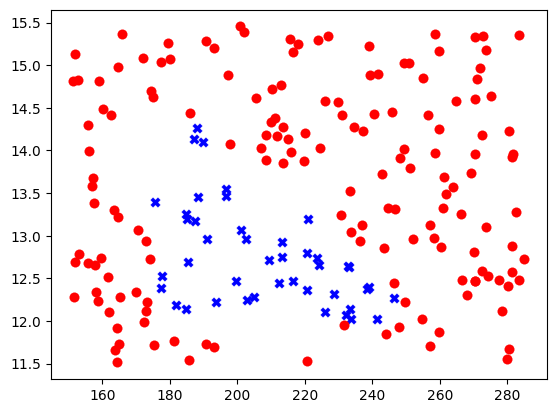

In [4]:
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], marker='X', color='b', linewidths=.1, s=50)
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], marker='o', color='r', linewidths=.1, s=50)
plt.show()

#### Normalising and tiling the dataset

In [5]:
norm=Normalization(axis=1) # norm is the normalisation layer object
norm.adapt(X) # adapt function calculates the value of mean and variance of each column(axis is set to be 0)
Xn=norm(X)

In [6]:
Xt=np.tile(Xn,(100,1))
Yt=np.tile(Y, (100,1))

#### Building the model

In [7]:
model=ln.Network([(2,),
                  ln.Layer(units=3, activation='sigmoid', label='L1'),
                  ln.Layer(units=1, activation='sigmoid', label='L2')])

In [8]:
model.get_weights()     #weights before training(initialised wieghts)

L1
Weights: 
[[-0.15687255 -0.40326059  0.58180577]
 [ 0.7239478   0.29797919 -1.17988963]
 [ 0.41029027 -0.29782651 -0.34851784]]
L2
Weights: 
[[-1.22399158  0.21121873  0.08630595 -1.25344088]]


In [9]:
model.train(Xt, Yt, 30, .01)

In [10]:
X_test = np.array([[200,13.9],[200,17]])
X_testn=norm(X_test) #normalising the test data
a1=model(X_testn[0])
a2=model(X_testn[1])
print(a1)   #expected output 1
print(a2)   #expected output 0

Node: data=[0.7901], label='I: L3', op='['buf']'
Node: data=[0.0006], label='I: L3', op='['buf']'


In [11]:
model.get_weights()     #weights after training

L1
Weights: 
[[10.13386302  8.56758055  0.84814919]
 [ 0.46498658 -7.31849539 -9.35117843]
 [ 8.97422664  0.03782033  9.60702517]]
L2
Weights: 
[[-15.13776494 -12.936358    13.78156075  -6.0370046 ]]


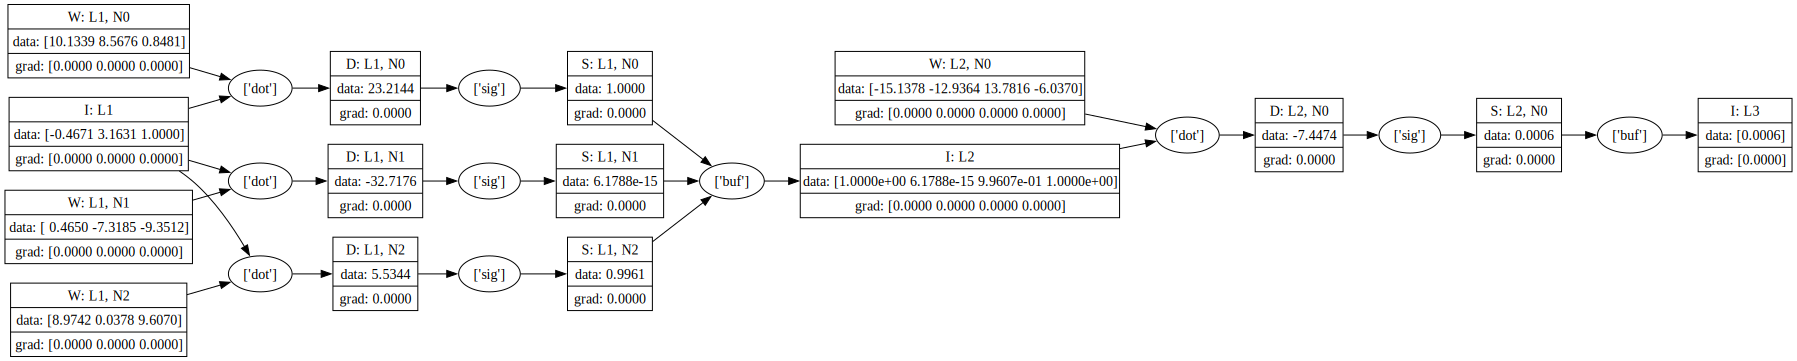

In [12]:
model.draw()

In [13]:
w1=model.layers[1].get_weights()
w1

array([[10.13386302,  8.56758055,  0.84814919],
       [ 0.46498658, -7.31849539, -9.35117843],
       [ 8.97422664,  0.03782033,  9.60702517]])

#### Visualising the desicion boundries created by the network

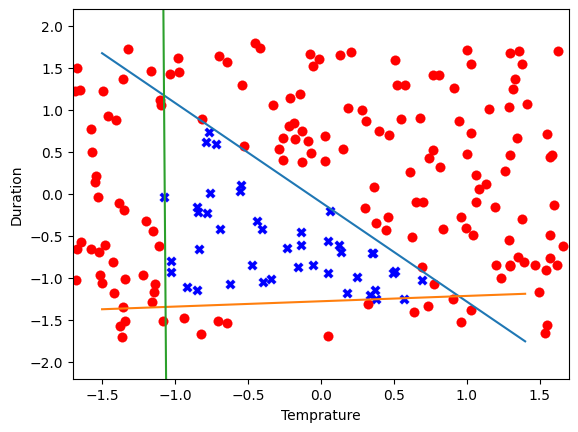

In [14]:
Xp=np.arange(-1.5,1.5,.1, dtype=float)
Xp1=np.arange(-.5,.5,.01, dtype=float)

Y0= -(Xp*w1[0][0])/w1[0][1]-(w1[0][2]/w1[0][1])
Y1= -(Xp*w1[1][0])/w1[1][1]-(w1[1][2]/w1[1][1])
Y2= -(Xp*w1[2][0])/w1[2][1]-(w1[2][2]/w1[2][1])
Xn2=np.array(Xn) # Xn is a tensor while Xn2 is a numpy array, this conversion is important
plt.scatter(Xn2[Y[:,0]==1,0], Xn2[Y[:,0]==1,1], marker='X', color='b', linewidths=.1, s=50)
plt.scatter(Xn2[Y[:,0]==0,0], Xn2[Y[:,0]==0,1], marker='o', color='r', linewidths=.1, s=50)
plt.plot(Xp,Y0)
plt.plot(Xp,Y1)
plt.plot(Xp, Y2)
plt.xlabel('Temprature')
plt.ylabel('Duration')
plt.xlim(-1.7,1.7)
plt.ylim(-2.2,2.2)
plt.show()

In [15]:
model.score(Xt, Yt)

1.0